### Assignment-2B:Process Consumer

Name: Ashwin Deshmukh<br>
Student Id: 30488745

<IPython.core.display.Javascript object>


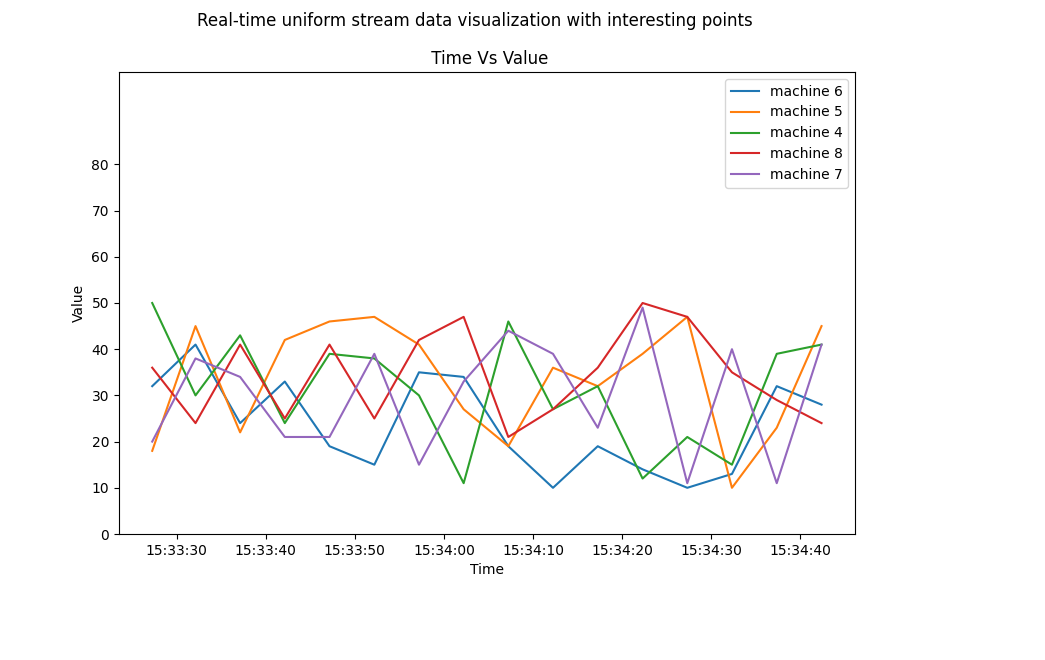

KeyboardInterrupt: 

In [1]:
# import statements
from time import sleep
from kafka import KafkaConsumer
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
from json import loads
from datetime import timedelta
import datetime
from datetime import timezone
from datetime import timedelta
# this line is needed for the inline display of graphs in Jupyter Notebook
%matplotlib notebook

topic = 'Streaming_Linux_process'
main_list=[]

# function to plot the graph
def init_plots():
     try:
        width = 9.5
        height = 6
        fig = plt.figure(figsize=(width,height)) # create new figure
        fig.subplots_adjust(hspace=0.8)
        ax1 = fig.add_subplot(111)
        ax1.set_xlabel('Time')
        ax1.set_ylabel('Value')
        fig.suptitle('Real-time uniform stream data visualization with interesting points') # set title
        fig.show() # display figure
        fig.canvas.draw() # draw  canvas
        return fig, ax1
     except Exception as ex:
        print(str(ex))
# function to connect to kafka consumer   
def connect_kafka_consumer():
    _consumer = None
    try:
         _consumer = KafkaConsumer(topic,
                                   consumer_timeout_ms=10000, # if no msg for 10 seconds then stop iteration
                                   auto_offset_reset='latest', 
                                   bootstrap_servers=['localhost:9092'],
                                   value_deserializer=lambda x: loads(x.decode('ascii')),
                                   api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer
# function to read message and plot the graph   
def consume_messages(consumer,fig, ax1):
    
    try:
        machine_list=[6, 5, 4, 8, 7]    # initialize the machine list
        
        x1, x2,x3,x4,x5,y1,y2,y3,y4,y5, l1= [],[],[],[],[], [],[],[],[],[],[]
    
        # loop over the message     
        for message in consumer:
            # get current timestamp
            time_now=dt.datetime.utcnow()
            cntm1=0
            cntm2=0
            cntm3=0
            cntm4=0
            cntm5=0
            data_list=message.value
            # loop over the list
            for i in range(len(data_list)):
                data_dict=data_list[i]
                # get the machine for each dictionary in the list
                mach=int(data_dict.get('machine'))
                # see if it matches the elements in machine list
                # if yes increment the count for each machine
                if mach== machine_list[0]:
                    cntm1+=1            
                if mach== machine_list[1]:
                    cntm2+=1
                if mach== machine_list[2]:
                    cntm3+=1
                if mach== machine_list[3]:
                    cntm4+=1
                if mach== machine_list[4]:
                    cntm5+=1
            # append the counts for each machine to seperate lists
            y1.append(cntm1)
            y2.append(cntm2)
            y3.append(cntm3)
            y4.append(cntm4)
            y5.append(cntm5)
            # append current timestamp to seperate lists
            x1.append(time_now)
            x2.append(time_now)
            x3.append(time_now)
            x4.append(time_now)
            x5.append(time_now)
            # check if elements are arriving in the last 2 mins and then pop the first values from the lists
            if (x1[-1]-x1[0]).seconds>120:
                
                y1.pop(0)
                y2.pop(0)
                y3.pop(0)
                y4.pop(0)
                y5.pop(0)
                x1.pop(0)
                x2.pop(0)
                x3.pop(0)
                x4.pop(0)
                x5.pop(0)
            # plot the line grapg for each machine
            ax1.clear()
            
            ax1.plot(x1, y1,label='machine 6')
            
            ax1.plot(x2, y2,label='machine 5')
            
            ax1.plot(x3, y3,label='machine 4')
                    
            ax1.plot(x4, y4,label='machine 8')
     
            ax1.plot(x5, y5,label='machine 7')


            ax1.set_xlabel('Time')
            ax1.set_ylabel('Value')
            ax1.set_title(' Time Vs Value')
            ax1.set_ylim(0,100) 
            ax1.legend()  # draw legend
            
            ax1.set_yticks([0,10,20,30,40,50,60,70,80])
            

            fig.canvas.draw()

               
        plt.close('all')
    except Exception as ex:
        print(str(ex))

if __name__ == '__main__':
    consumer = connect_kafka_consumer()
    fig, ax = init_plots()    
    consume_messages(consumer, fig, ax)   